# Load data

In [1]:
# import pandas library
import pandas as pd
import numpy as np
climate = pd.read_csv("agriculture.csv",header=0)
#print(climate.head())
climate.head()

/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Year Country         Region  Crop_Type  Average_Temperature_C  \
0  2001   India    West Bengal       Corn                   1.55   
1  2024   China          North       Corn                   3.23   
2  2001  France  Ile-de-France      Wheat                  21.11   
3  2001  Canada       Prairies     Coffee                  27.85   
4  1998   India     Tamil Nadu  Sugarcane                   2.19   

   Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
0                  447.06             15.22                 1.737   
1                 2913.57             29.82                 1.737   
2                 1301.74             25.75                 1.719   
3                 1154.36             13.91                 3.890   
4                 1627.48             11.81                 1.080   

   Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
0                       8                14.54                    10.08   
1                       8                11.05                    33.06   
2                       5                84.42                    27.41   
3                       5                94.06                    14.38   
4                       9                95.75                    44.35   

   Fertilizer_Use_KG_per_HA  Soil_Health_Index Adaptation_Strategies  \
0                     14.78              83.25      Water Management   
1                     23.25              54.02         Crop Rotation   
2                     65.53              67.78      Water Management   
3                     87.58              91.39         No Adaptation   
4                     88.08              49.61         Crop Rotation   

   Economic_Impact_Million_USD  
0                       808.13  
1                       616.22  
2                       796.96  
3                       790.32  
4                       401.72

# Data Preparing

In [2]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [3]:
# finding missing values
climate.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [4]:
# finding if there is any duplicated value or not?
climate.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

# Exploratory Data Analysis

In [5]:
# descriptive statistics
climate.describe()


Year  Average_Temperature_C  Total_Precipitation_mm  \
count  10000.000000           10000.000000            10000.000000   
mean    2007.088700              15.241299             1611.663834   
std       10.084245              11.466955              805.016815   
min     1990.000000              -4.990000              200.150000   
25%     1999.000000               5.430000              925.697500   
50%     2007.000000              15.175000             1611.160000   
75%     2016.000000              25.340000             2306.997500   
max     2024.000000              35.000000             2999.670000   

       CO2_Emissions_MT  Crop_Yield_MT_per_HA  Extreme_Weather_Events  \
count      10000.000000          10000.000000            10000.000000   
mean          15.246608              2.240017                4.980900   
std            8.589423              0.998342                3.165808   
min            0.500000              0.450000                0.000000   
25%            7.760000              1.449000                2.000000   
50%           15.200000              2.170000                5.000000   
75%           22.820000              2.930000                8.000000   
max           30.000000              5.000000               10.000000   

       Irrigation_Access_%  Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
count         10000.000000             10000.000000              10000.000000   
mean             55.248332                24.955735                 49.973708   
std              25.988305                14.490962                 28.711027   
min              10.010000                 0.000000                  0.010000   
25%              32.677500                12.527500                 25.390000   
50%              55.175000                24.930000                 49.635000   
75%              77.582500                37.470000                 74.825000   
max              99.990000                49.990000                 99.990000   

       Soil_Health_Index  Economic_Impact_Million_USD  
count       10000.000000                 10000.000000  
mean           64.901278                   674.269658  
std            20.195882                   414.591431  
min            30.000000                    47.840000  
25%            47.235000                   350.545000  
50%            64.650000                   583.920000  
75%            82.472500                   917.505000  
max           100.000000                  2346.470000

## Distribution of Key Variables

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

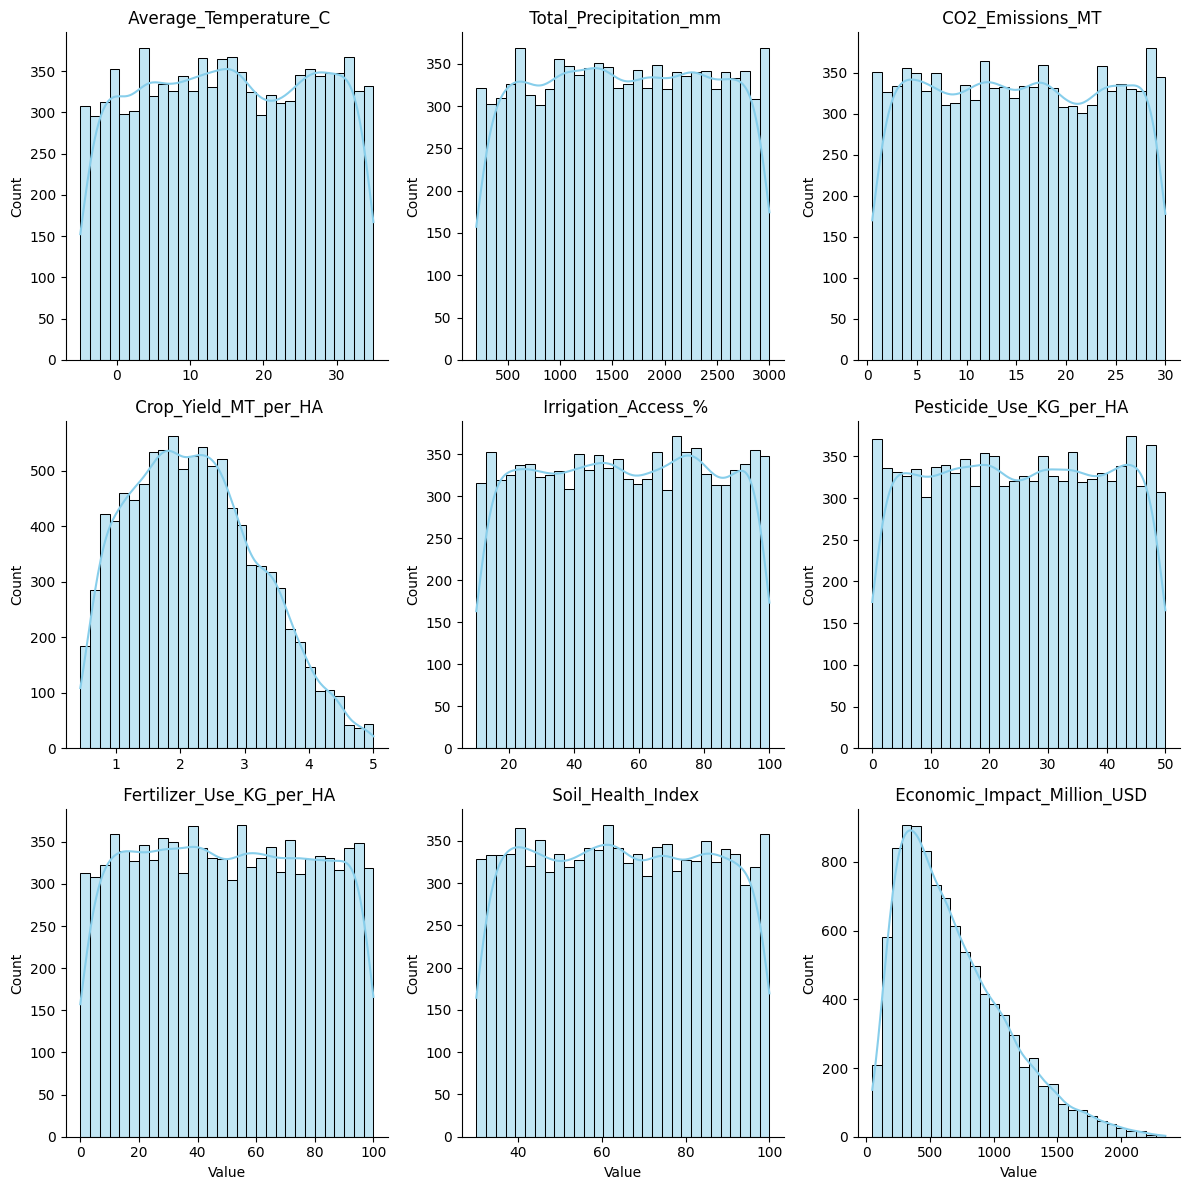

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the dataframe to long format for FacetGrid
df_long = climate[numeric_cols].melt(var_name='Feature', value_name='Value')

# Create FacetGrid
g = sns.FacetGrid(df_long, col="Feature", col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.histplot, "Value", kde=True, bins=30, color="skyblue")

# Adjust titles
for ax in g.axes.flatten():
    ax.set_title(ax.get_title().split('=')[1])

plt.tight_layout()
plt.show()


# Regional Comparison

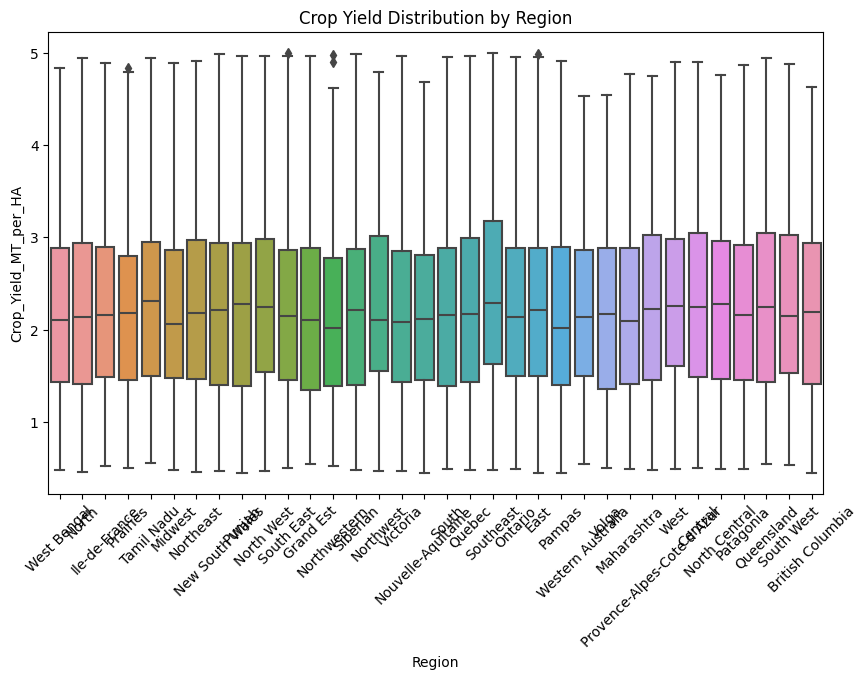

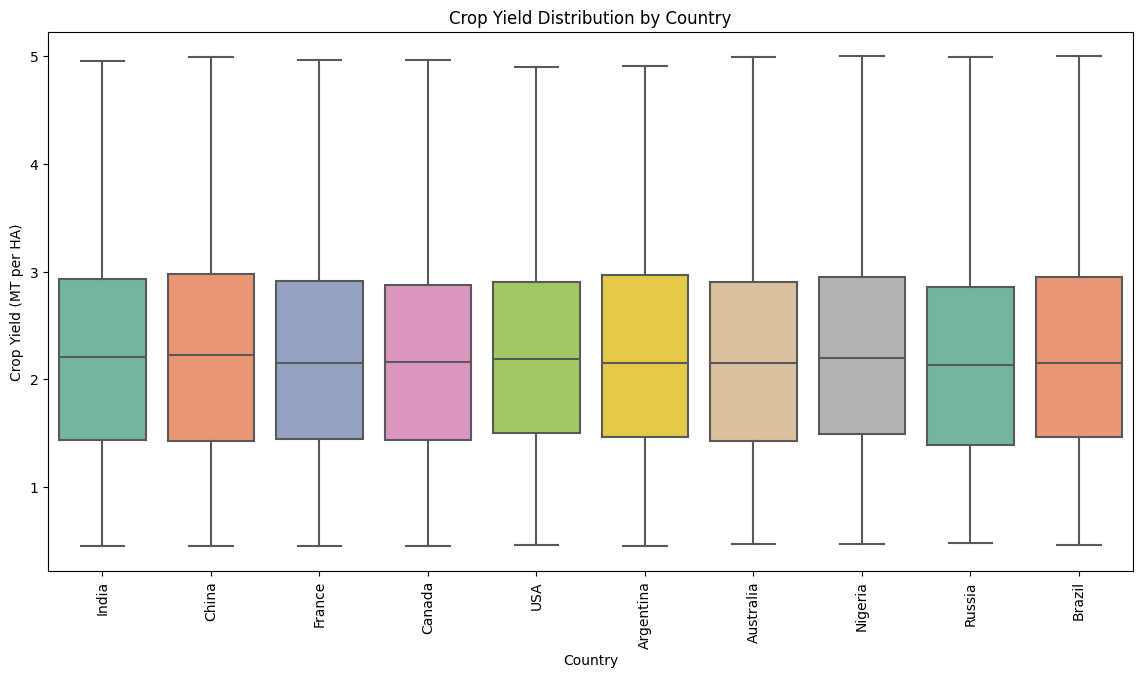

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(data=climate, x="Region", y="Crop_Yield_MT_per_HA")
plt.xticks(rotation=45)
plt.title("Crop Yield Distribution by Region")
plt.show()




plt.figure(figsize=(14,7))
sns.boxplot(data=climate, x="Country", y="Crop_Yield_MT_per_HA", palette="Set2")

plt.xticks(rotation=90)
plt.title("Crop Yield Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Crop Yield (MT per HA)")
plt.legend([],[], frameon=False)  # Boxplot already has country on x-axis
plt.show()


# Extreme Weather Impact

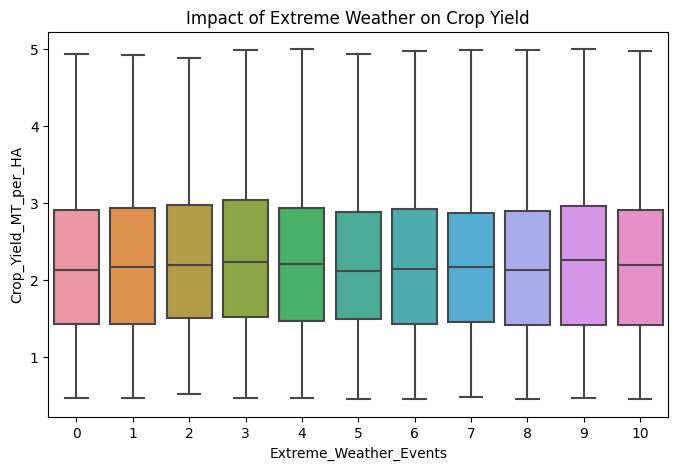

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(data=climate, x="Extreme_Weather_Events", y="Crop_Yield_MT_per_HA")
plt.title("Impact of Extreme Weather on Crop Yield")
plt.show()

# Adapatation strategies

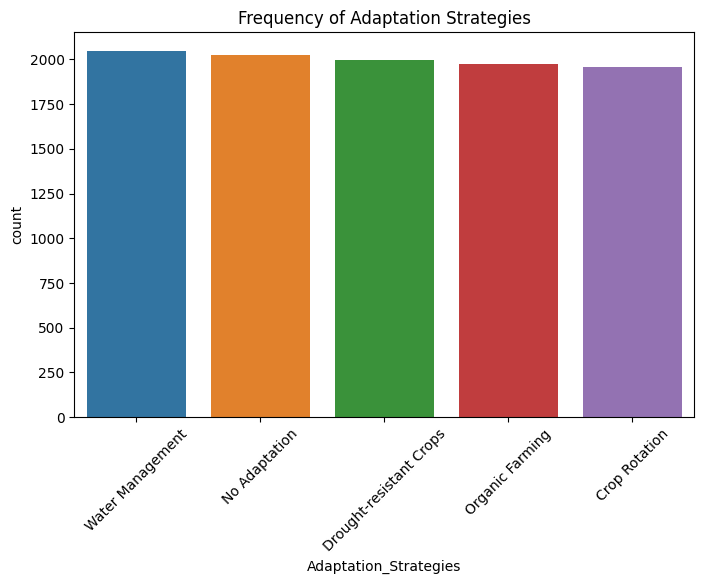

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=climate, x="Adaptation_Strategies", order=climate["Adaptation_Strategies"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Frequency of Adaptation Strategies")
plt.show()

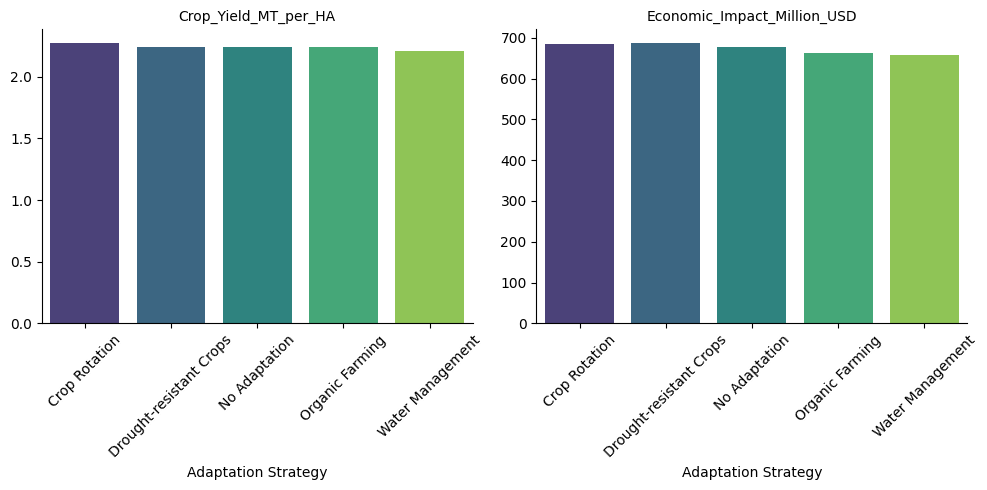

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data in long format
strategy_long = strategy_summary.melt(
    id_vars="Adaptation_Strategies",
    value_vars=["Crop_Yield_MT_per_HA", "Economic_Impact_Million_USD"],
    var_name="Metric",
    value_name="Value"
)

# Create FacetGrid
g = sns.FacetGrid(strategy_long, col="Metric", sharey=False, height=5, aspect=1)
g.map_dataframe(sns.barplot, x="Adaptation_Strategies", y="Value", palette="viridis")
g.set_axis_labels("Adaptation Strategy", "")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
g.tight_layout()
plt.show()


# Crop Distribution

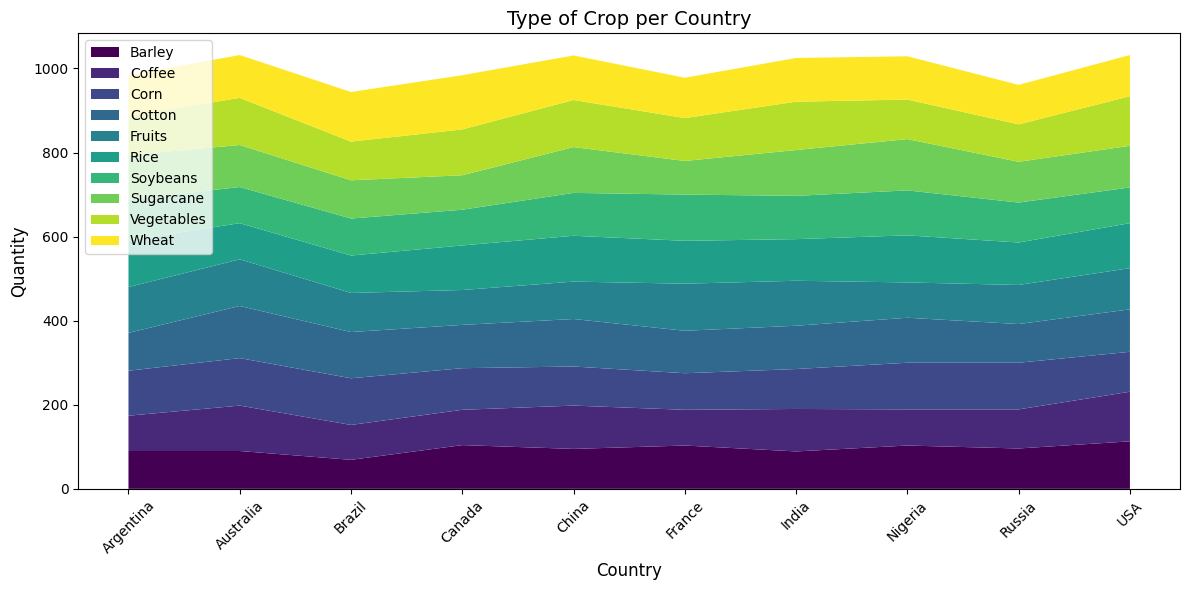

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Group by Country and Crop_Type
o = climate.groupby(['Country', 'Crop_Type']).size().unstack(fill_value=0)
crop = o.columns

# Convert countries to numeric x for stackplot
x = np.arange(len(o.index))
y = o.values.T  # transpose to match stackplot input

colors = plt.cm.viridis(np.linspace(0, 1, len(crop)))

plt.figure(figsize=(12, 6))
plt.stackplot(x, y, labels=crop, colors=colors)

plt.title("Type of Crop per Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(x, o.index, rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Trend over time

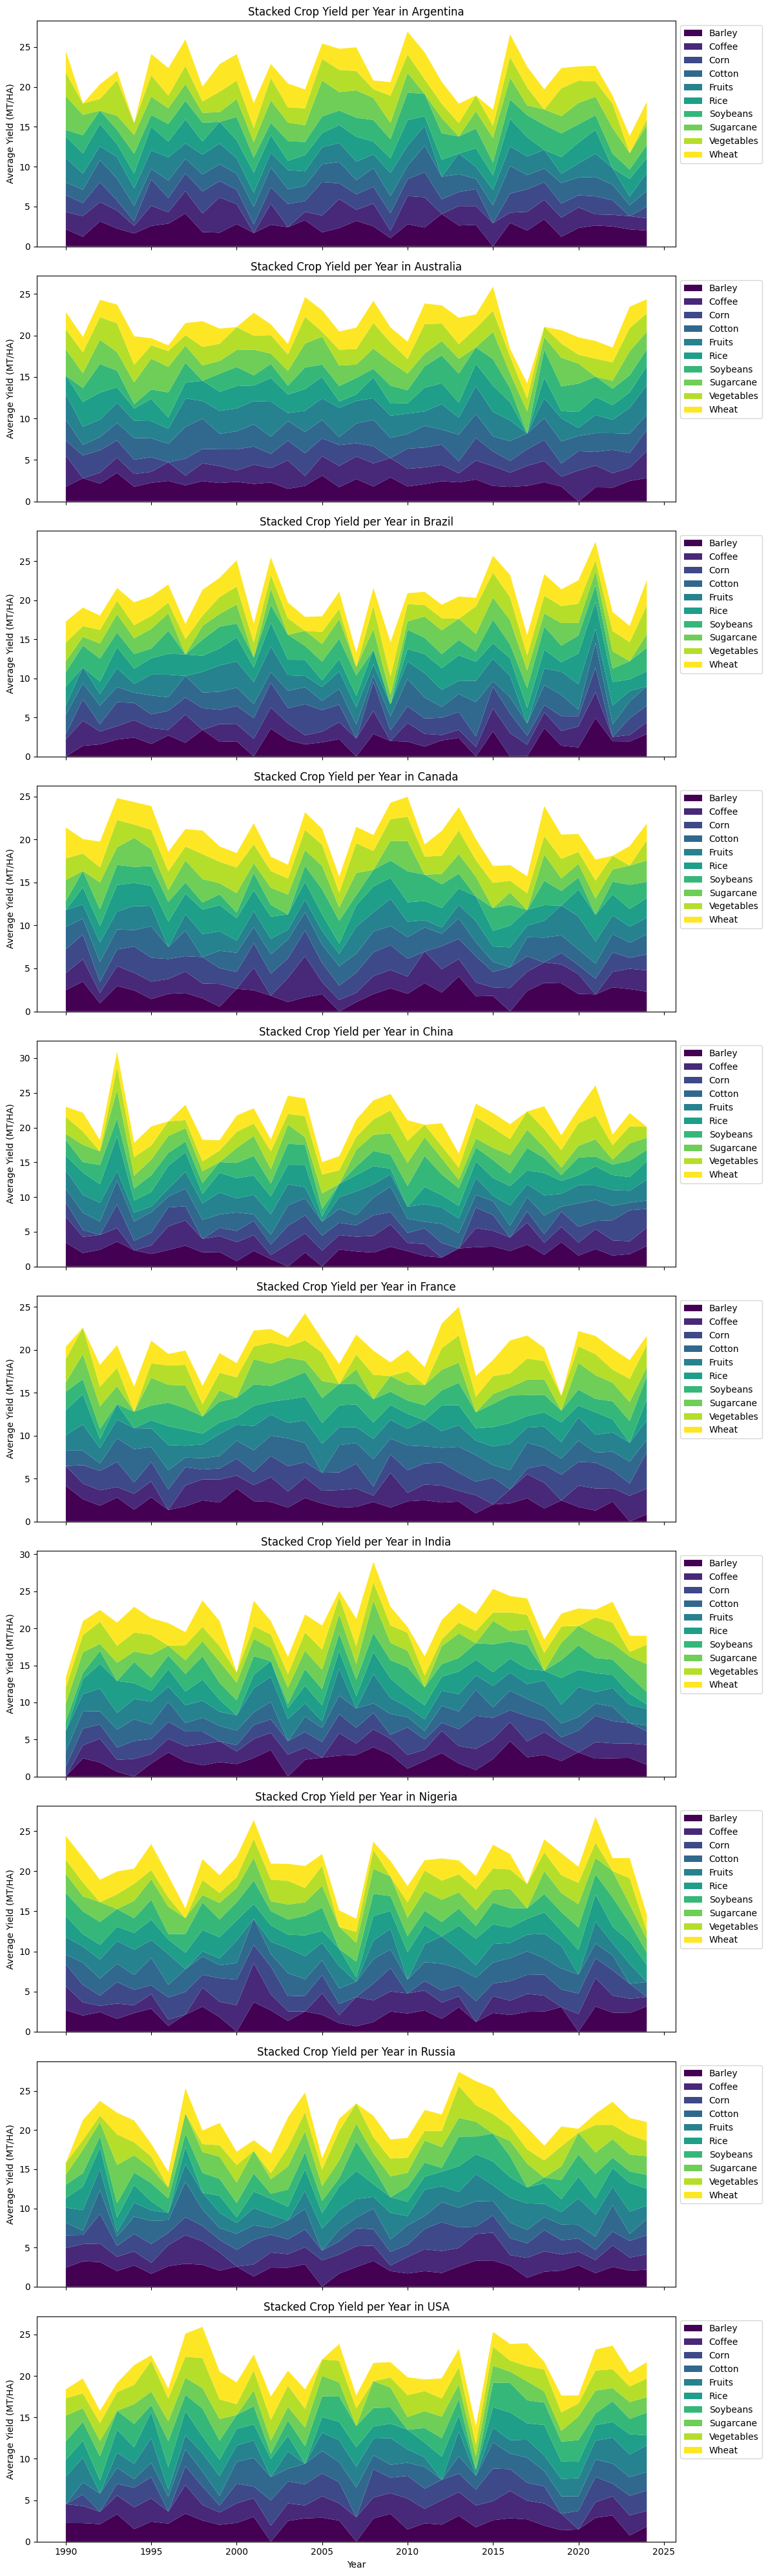

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Aggregate average crop yield by Year, Country, Crop_Type
agg_yield = climate.groupby(['Year', 'Country', 'Crop_Type'])['Crop_Yield_MT_per_HA'].mean().reset_index()

# Pivot to have years as rows, crop types as columns for each country
def prepare_country_data(df):
    return df.pivot(index='Year', columns='Crop_Type', values='Crop_Yield_MT_per_HA').fillna(0)

countries = agg_yield['Country'].unique()
n_countries = len(countries)

# Create stacked plot for each country
fig, axes = plt.subplots(n_countries, 1, figsize=(12, 4*n_countries), sharex=True)

if n_countries == 1:
    axes = [axes]  # Ensure axes is iterable

for ax, country in zip(axes, countries):
    country_data = agg_yield[agg_yield['Country'] == country]
    pivot_data = prepare_country_data(country_data)
    
    years = pivot_data.index
    crop_types = pivot_data.columns
    values = pivot_data.values.T
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(crop_types)))
    ax.stackplot(years, values, labels=crop_types, colors=colors)
    ax.set_title(f"Stacked Crop Yield per Year in {country}")
    ax.set_ylabel("Average Yield (MT/HA)")
    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1))

axes[-1].set_xlabel("Year")
plt.tight_layout()
plt.show()


# Correlation map/Heat map

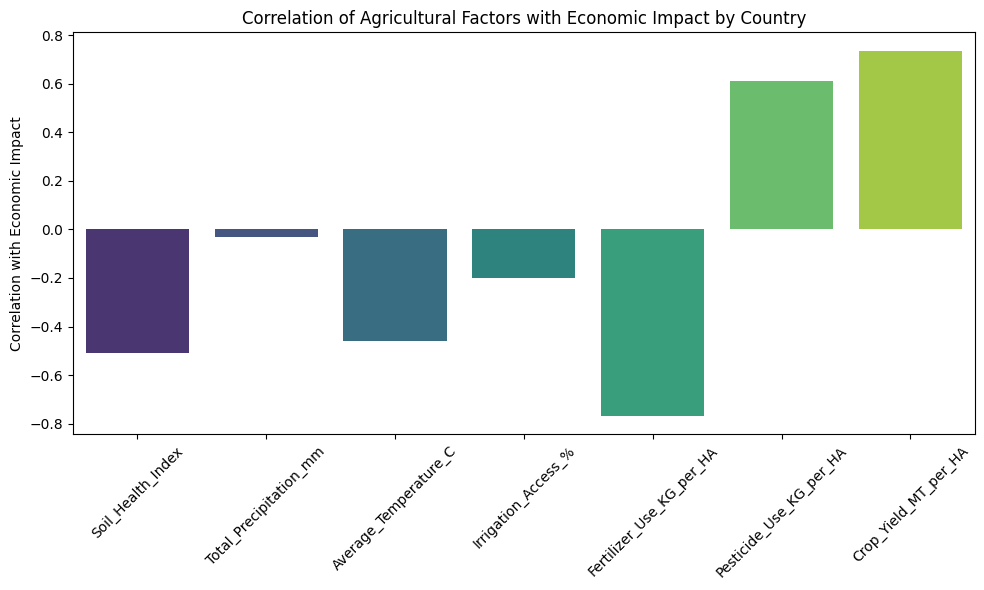

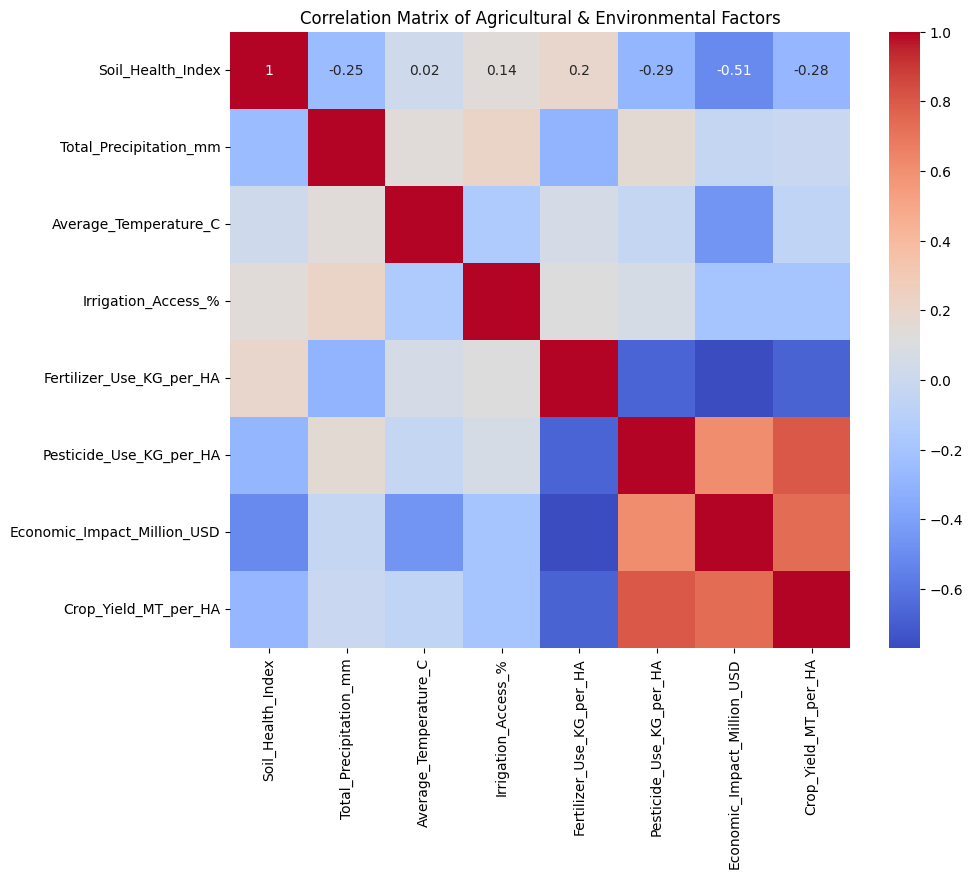

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
cols = ['Country', 'Soil_Health_Index', 'Total_Precipitation_mm', 'Average_Temperature_C',
        'Irrigation_Access_%', 'Fertilizer_Use_KG_per_HA', 'Pesticide_Use_KG_per_HA', 
        'Economic_Impact_Million_USD','Crop_Yield_MT_per_HA' ]

df_country = climate[cols]

# Aggregate by Country (mean values)
country_data = df_country.groupby('Country').mean()

# Compute correlation with Economic Impact
corr = country_data.corr()['Economic_Impact_Million_USD'].drop('Economic_Impact_Million_USD')

# Plot as bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=corr.index, y=corr.values, palette='viridis')
plt.title('Correlation of Agricultural Factors with Economic Impact ')
plt.ylabel('Correlation with Economic Impact')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Heatmap for all correlations
plt.figure(figsize=(10,8))
sns.heatmap(country_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Agricultural & Environmental Factors')
plt.show()


###  bar chart showing how strongly each factor correlates with economic impact.

### a heatmap shows correlations between all important variables.

# Climate Yield relationship

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWar

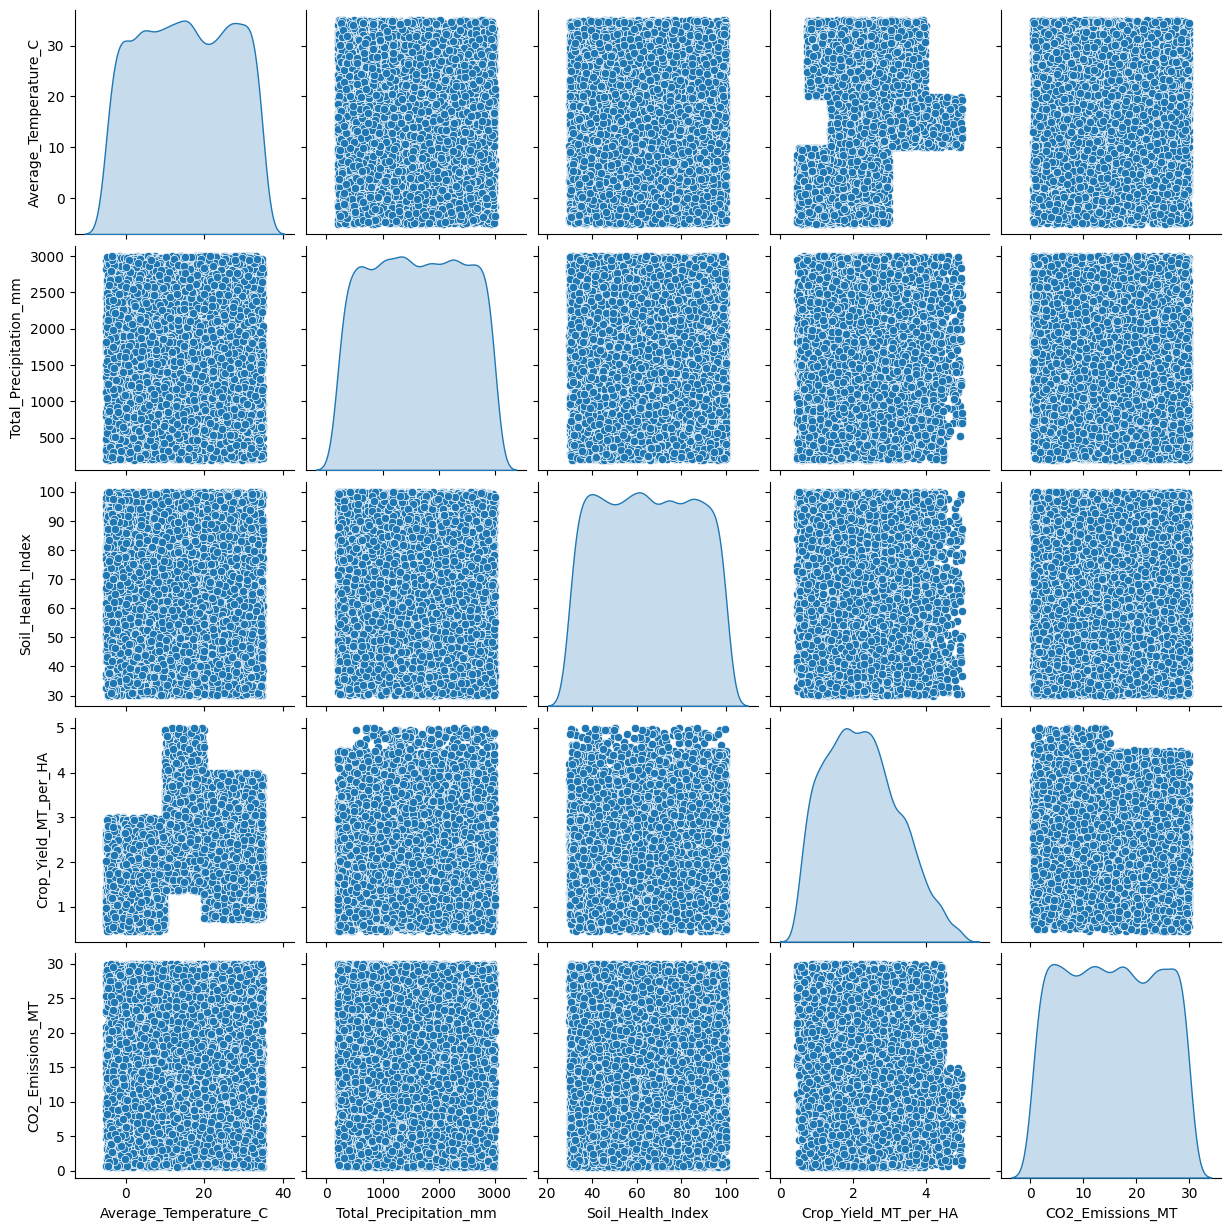

In [67]:
#Climate–Yield Relationships

sns.pairplot(climate, vars=["Average_Temperature_C", "Total_Precipitation_mm",
                       "Soil_Health_Index", "Crop_Yield_MT_per_HA","CO2_Emissions_MT"],
             kind="scatter", diag_kind="kde")
plt.show()

# Training model and Cross validation

### Random Forest

In [22]:
 #  Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# --- Separate Features and Target ---
X = climate.drop(columns=["Economic_Impact_Million_USD"])
y = climate["Economic_Impact_Million_USD"]

# --- One-Hot Encode categorical variables ---
categorical_cols = X.select_dtypes(include=["object"]).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Random Forest Model ---
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# --- Cross-Validation (Validation Step) ---
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# --- Evaluate on Test Data ---
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n Model Evaluation (Test Set):")
print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Feature Importance ---
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop Feature Importances:")
print(feature_importance.head(15))


/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Cross-Validation R² Scores: [0.50607614 0.5155674  0.48731858 0.48179247 0.48837184]
Average CV R²: 0.4958252852419992

 Model Evaluation (Test Set):
R²: 0.5330058598497553
MSE: 84232.28664051402
RMSE: 290.22799079433054
MAE: 226.456827575

Top Feature Importances:
                                          Feature  Importance
4                            Crop_Yield_MT_per_HA    0.561204
2                          Total_Precipitation_mm    0.043958
6                             Irrigation_Access_%    0.043064
9                               Soil_Health_Index    0.040928
7                         Pesticide_Use_KG_per_HA    0.040720
1                           Average_Temperature_C    0.039825
3                                CO2_Emissions_MT    0.039649
8                        Fertilizer_Use_KG_per_HA    0.039049
0                                            Year    0.030960
5                          Extreme_Weather_Events    0.021505
61  Adaptation_Strategies_Drought-resistant Crops   

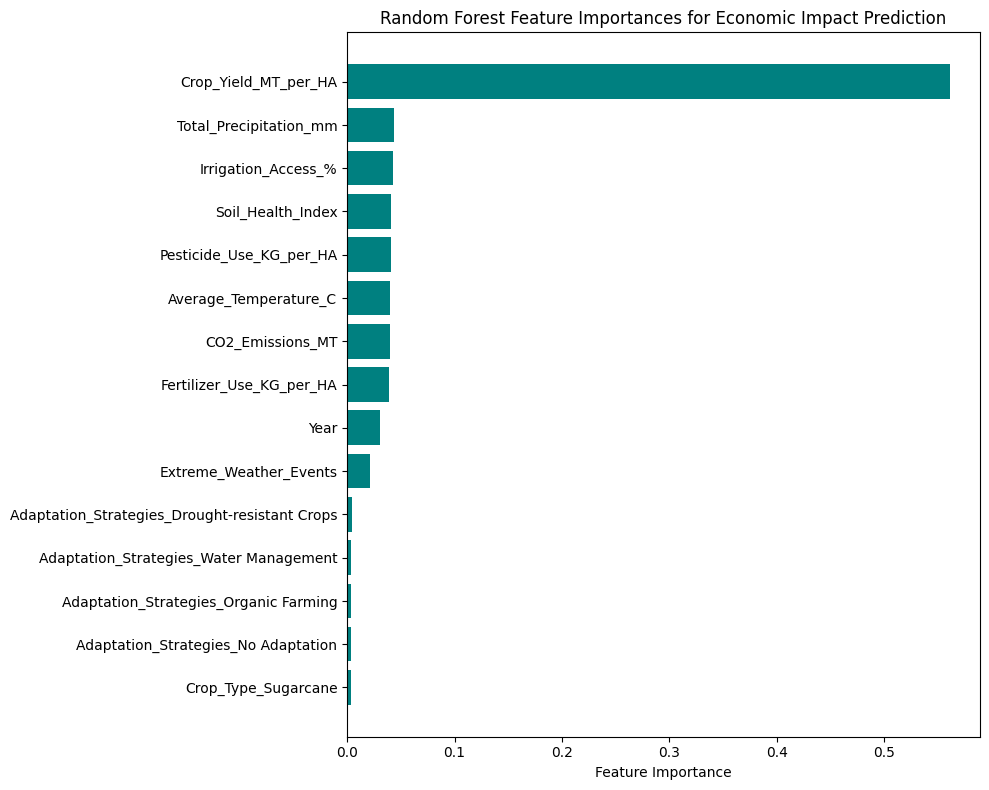

In [23]:
# Important features plot from RF
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have this from your model
feature_importances = pd.DataFrame({
    'Feature': [
        'Year',
        'Average_Temperature_C',
        'Total_Precipitation_mm',
        'CO2_Emissions_MT',
        'Crop_Yield_MT_per_HA',
        'Extreme_Weather_Events',
        'Irrigation_Access_%',
        'Pesticide_Use_KG_per_HA',
        'Fertilizer_Use_KG_per_HA',
        'Soil_Health_Index',
        'Adaptation_Strategies_Drought-resistant Crops',
        'Adaptation_Strategies_No Adaptation',
        'Adaptation_Strategies_Organic Farming',
        'Adaptation_Strategies_Water Management',
        'Crop_Type_Sugarcane'
    ],
    'Importance': [
        0.030960, 0.039825, 0.043958, 0.039649, 0.561204,
        0.021505, 0.043064, 0.040720, 0.039049, 0.040928,
        0.004277, 0.003284, 0.003357, 0.003820, 0.003118
    ]
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10,8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='teal')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances for Economic Impact Prediction")
plt.tight_layout()
plt.show()


### Random Forest with Important Features

In [24]:
# --- Use full one-hot encoded data ---
X = pd.get_dummies(climate.drop(columns=["Economic_Impact_Million_USD"]), drop_first=True)
y = climate["Economic_Impact_Million_USD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RF
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
# Only use important features
important_features = [
    'Average_Temperature_C', 'Total_Precipitation_mm', 'Soil_Health_Index',
    'Irrigation_Access_%', 'Fertilizer_Use_KG_per_HA', 'Pesticide_Use_KG_per_HA',
    'Crop_Yield_MT_per_HA', 'CO2_Emissions_MT', 'Extreme_Weather_Events'
]

X = climate[important_features]
y = climate["Economic_Impact_Million_USD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RF
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
# --- Cross-Validation (Validation Step) ---
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="r2")
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# --- Evaluate on Test Data ---
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n Model Evaluation (Test Set):")
print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Feature Importance ---
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("\nTop Feature Importances:")
print(feature_importance.head())


Cross-Validation R² Scores: [0.50265432 0.50873642 0.48870289 0.48698042 0.48713597]
Average CV R²: 0.4948420042147285

 Model Evaluation (Test Set):
R²: 0.5274132076908531
MSE: 85241.03994002605
RMSE: 291.9606821817384
MAE: 227.98757547500003

Top Feature Importances:
                   Feature  Importance
6     Crop_Yield_MT_per_HA    0.574001
1   Total_Precipitation_mm    0.059710
3      Irrigation_Access_%    0.058980
5  Pesticide_Use_KG_per_HA    0.056500
2        Soil_Health_Index    0.055952


### Decision Tree With Important Features

Cross-Validation R² Scores: [0.01377513 0.01342391 0.06689124 0.01089775 0.00037413]
Average CV R²: 0.02107243117704378

 Model Evaluation (Test Set):
R²: 0.08803816223936867
MSE: 164491.63772964998
RMSE: 405.5756868078386
MAE: 304.670105

Top Feature Importances:
                     Feature  Importance
6      Crop_Yield_MT_per_HA    0.574902
3       Irrigation_Access_%    0.064151
4  Fertilizer_Use_KG_per_HA    0.061493
7          CO2_Emissions_MT    0.059202
1    Total_Precipitation_mm    0.055424
5   Pesticide_Use_KG_per_HA    0.052884
2         Soil_Health_Index    0.052519
0     Average_Temperature_C    0.049257
8    Extreme_Weather_Events    0.030168


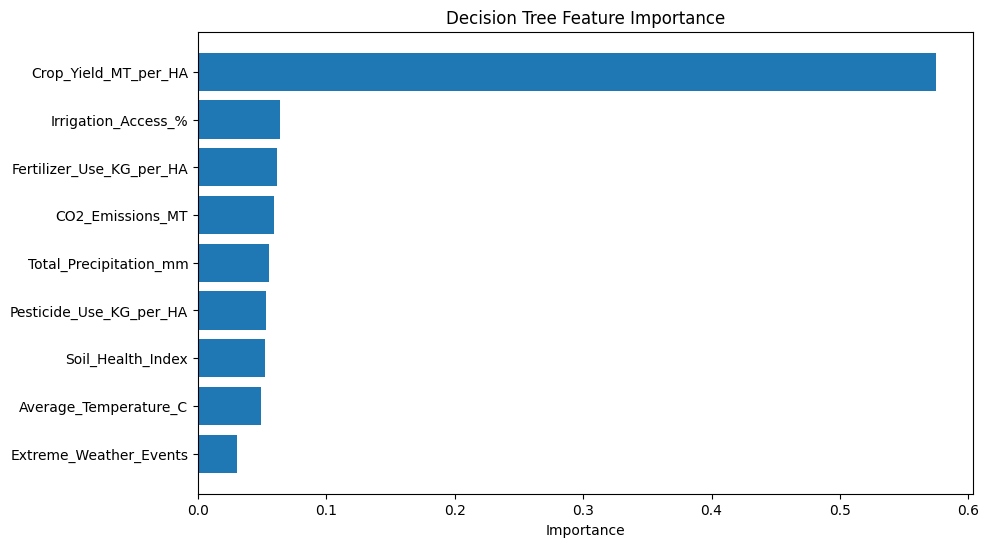

In [151]:
# --- Imports ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Features & Target ---
features = [
    'Average_Temperature_C', 'Total_Precipitation_mm', 'Soil_Health_Index',
    'Irrigation_Access_%', 'Fertilizer_Use_KG_per_HA', 'Pesticide_Use_KG_per_HA',
    'Crop_Yield_MT_per_HA', 'CO2_Emissions_MT', 'Extreme_Weather_Events'
]

X = climate[features]
y = climate['Economic_Impact_Million_USD']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Decision Tree Model ---
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# --- Cross-Validation ---
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# --- Test Set Evaluation ---
y_pred = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n Model Evaluation (Test Set):")
print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Feature Importance ---
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:\n", feat_importance)

# --- Plot Feature Importance ---
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.gca().invert_yaxis()
plt.show()


### XGBoost model with Important features

Cross-Validation R² Scores: [0.50244649 0.48430228 0.4695062  0.47051334 0.47177511]
Average CV R²: 0.47970868481724055

✅ Model Evaluation (Test Set):
R²: 0.5194046138313242
MSE: 86685.55950797239
RMSE: 294.42411502452103
MAE: 230.48968058288574

Top Feature Importances:
                     Feature  Importance
6      Crop_Yield_MT_per_HA    0.528631
0     Average_Temperature_C    0.070962
3       Irrigation_Access_%    0.061795
8    Extreme_Weather_Events    0.060294
7          CO2_Emissions_MT    0.059083
1    Total_Precipitation_mm    0.058673
4  Fertilizer_Use_KG_per_HA    0.054097
5   Pesticide_Use_KG_per_HA    0.053653
2         Soil_Health_Index    0.052812


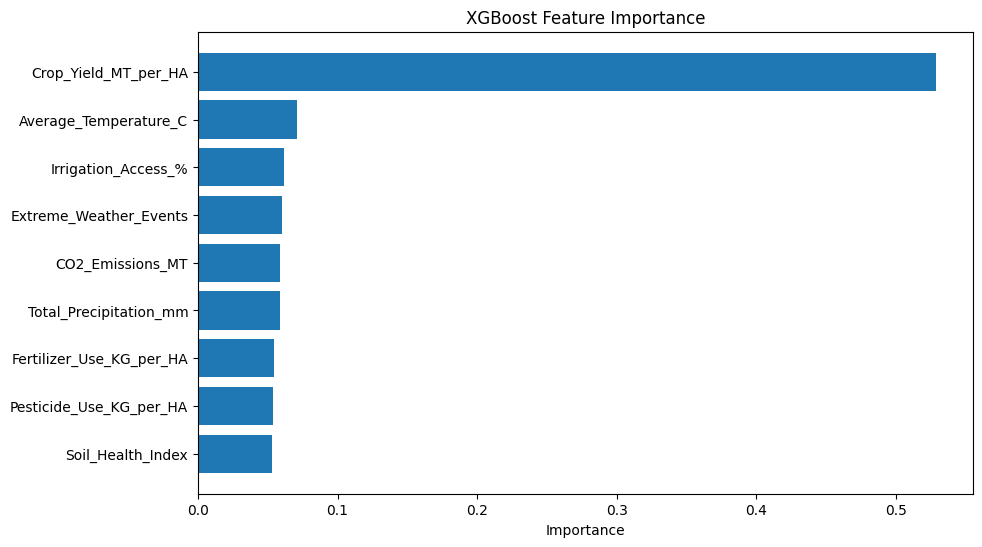

In [153]:
# --- Imports ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- XGBoost ---
import xgboost as xgb

# --- Features & Target ---
features = [
    'Average_Temperature_C', 'Total_Precipitation_mm', 'Soil_Health_Index',
    'Irrigation_Access_%', 'Fertilizer_Use_KG_per_HA', 'Pesticide_Use_KG_per_HA',
    'Crop_Yield_MT_per_HA', 'CO2_Emissions_MT', 'Extreme_Weather_Events'
]

X = climate[features]
y = climate['Economic_Impact_Million_USD']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- XGBoost Model ---
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# --- Cross-Validation ---
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R²:", np.mean(cv_scores))

# --- Test Set Evaluation ---
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\n✅ Model Evaluation (Test Set):")
print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# --- Feature Importance ---
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:\n", feat_importance)

# --- Plot Feature Importance ---
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.xlabel("Importance")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()



# Model Evaluation

/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning:

[21:24:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




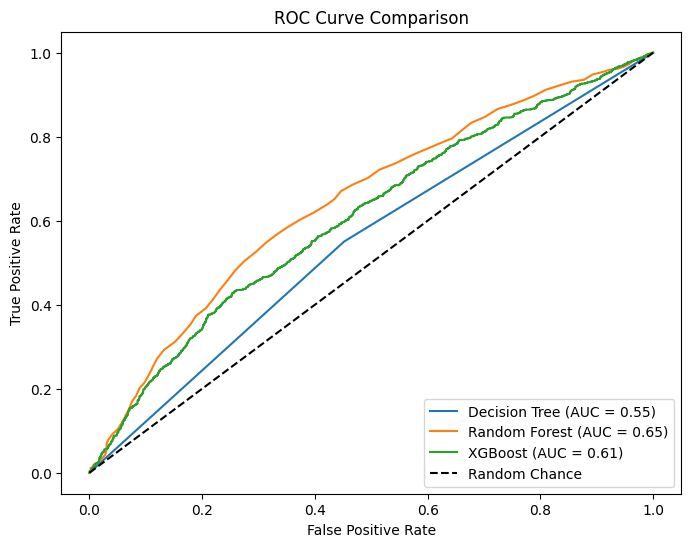

In [154]:
# --- Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Example: prepare data ---
# X: features, y: numeric target
# Assume climate is your dataset
climate['High_Impact'] = (climate['Economic_Impact_Million_USD'] > climate['Economic_Impact_Million_USD'].median()).astype(int)

X = climate[['Average_Temperature_C', 'Total_Precipitation_mm',
        'Soil_Health_Index', 'Irrigation_Access_%',
        'Fertilizer_Use_KG_per_HA', 'Pesticide_Use_KG_per_HA']]
y = climate['High_Impact']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Models ---
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# --- Plot ROC ---
plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:,1]  # probability for class 1
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


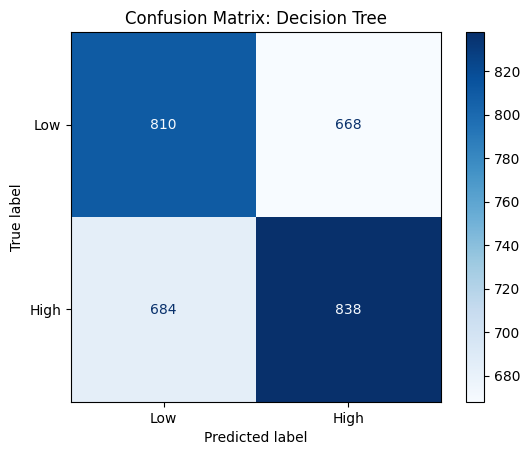

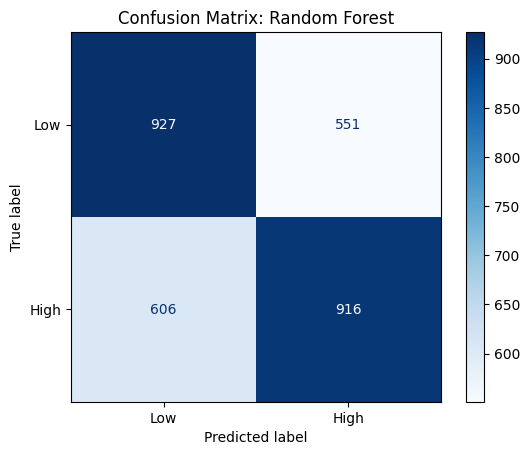

/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning:

[20:45:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




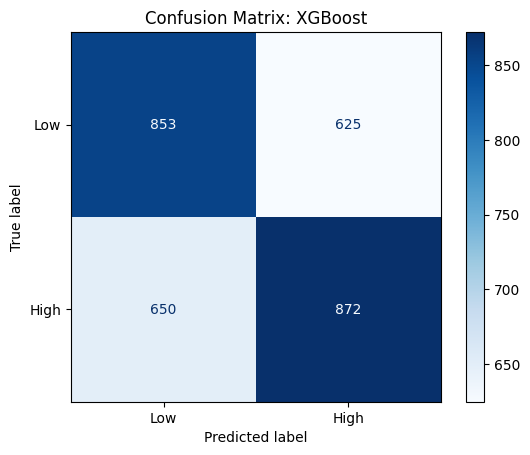

In [143]:
# --- Libraries ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Fit models and predict ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()


# hyperparameter tuning

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,            # number of random combinations to try
    cv=5,                 # 5-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

# Fit the model
rf_random.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", rf_random.best_params_)
best_rf = rf_random.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nEvaluation on Test Data:")
print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/hom

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}

Evaluation on Test Data:
R²: 0.5807644835882972
MSE: 0.18772753654590812
RMSE: 0.43327535880304585
MAE: 0.3651643924469669


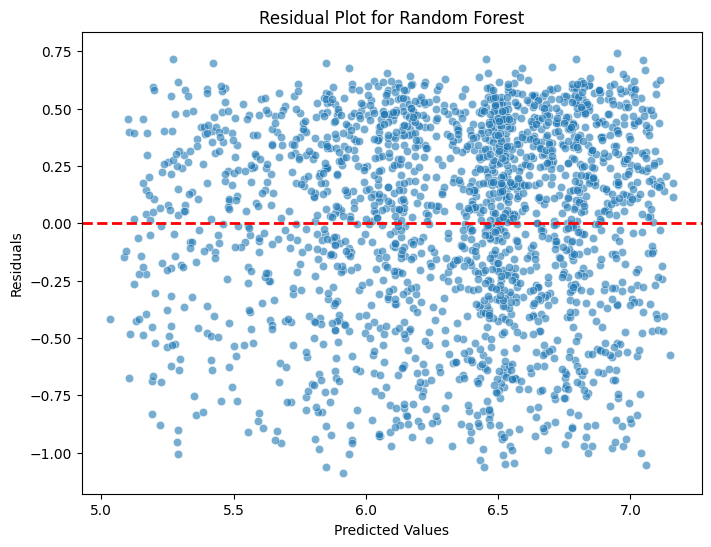

In [35]:
import matplotlib.pyplot as plt

# --- Residual Plot ---
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest")
plt.show()


### We will try with log transformation to see if R square improve or not

R²: 0.49037049237847974 RMSE: 303.1872002771387


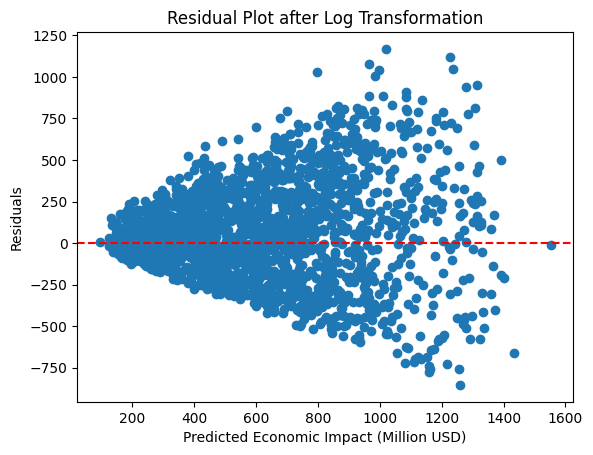

In [28]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# --- Features & Target ---
top_features = [
    'Crop_Yield_MT_per_HA',
    'Total_Precipitation_mm',
    'Irrigation_Access_%',
    'Soil_Health_Index',
    'Pesticide_Use_KG_per_HA',
    'Average_Temperature_C',
    'CO2_Emissions_MT',
    'Fertilizer_Use_KG_per_HA'
]

X = climate[top_features]
y = np.log1p(climate['Economic_Impact_Million_USD'])  # log(1 + x) to handle zeros

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_log = rf_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # back-transform to millions USD
y_test_orig = np.expm1(y_test)

# Evaluate
r2 = r2_score(y_test_orig, y_pred)
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
print("R²:", r2, "RMSE:", rmse)
residuals = y_test_orig - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Economic Impact (Million USD)")
plt.ylabel("Residuals")
plt.title("Residual Plot after Log Transformation")
plt.show()


### hyperparameter tuning for log transformation

In [29]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_model = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(rf_model, param_grid, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)
search.fit(X_train, y_train)

best_rf = search.best_estimator_
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)
r2 = r2_score(np.expm1(y_test), y_pred)
print("R² after tuning:", r2)


/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/e92768ac-05d3-4573-b1ab-de1781e3f4c1/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/hom

R² after tuning: 0.5089407269982097


### After tuning with log transformation we obtain R² after tuning: 0.5089407269982097 whereas
### Without log transforfation we obtain R² after tuning: 0.5807644835882972
